# Explore the dataset


In this notebook, we will perform an EDA (Exploratory Data Analysis) on the processed Waymo dataset (data in the `processed` folder). In the first part, you will create a function to display 

In [1]:
from utils import get_dataset
import glob
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import numpy as np
import os

%matplotlib inline

In [2]:
dataset = get_dataset("/media/ssd_fast/work/udacity/self_driving_cars/data/processed/*.tfrecord")

INFO:tensorflow:Reading unweighted datasets: ['/media/ssd_fast/work/udacity/self_driving_cars/data/processed/*.tfrecord']
INFO:tensorflow:Reading record datasets for input file: ['/media/ssd_fast/work/udacity/self_driving_cars/data/processed/*.tfrecord']
INFO:tensorflow:Number of filenames to read: 94
Instructions for updating:
Use `tf.data.Dataset.interleave(map_func, cycle_length, block_length, num_parallel_calls=tf.data.AUTOTUNE)` instead. If sloppy execution is desired, use `tf.data.Options.experimental_deterministic`.
Instructions for updating:
Use `tf.data.Dataset.map()
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: module 'gast' has no attribute 'Index'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_

## Write a function to display an image and the bounding boxes

Implement the `display_instances` function below. This function takes a batch as an input and display an image with its corresponding bounding boxes. The only requirement is that the classes should be color coded (eg, vehicles in red, pedestrians in blue, cyclist in green).

In [3]:
def display_instances(batch):
    """
    This function takes a batch from the dataset and display the image with 
    the associated bounding boxes.
    """
    # mapping color to class labels
    color_map = {1: 'red', 2: 'blue', 4: 'green'}
    
    # create subplots to display images
    fig, ax = plt.subplots() 
    im = batch["image"].numpy()
    ax.imshow(im)
    
    # drawing bounding boxes and adding color to different class labels
    for coord, label in zip(batch["groundtruth_boxes"].numpy(), batch["groundtruth_classes"].numpy()):
        xy = (coord[1]*im.shape[1], coord[0]*im.shape[0])
        width = (coord[3] - coord[1])*im.shape[1]
        height = (coord[2] - coord[0])*im.shape[0]
        rec = patches.Rectangle(xy, width, height, linewidth=1, edgecolor=color_map[label], facecolor='none')
        ax.add_patch(rec)
    plt.axis("off")

## Display 10 images 

Using the dataset created in the second cell and the function you just coded, display 10 random images with the associated bounding boxes. You can use the methods `take` and `shuffle` on the dataset.

<Figure size 720x720 with 0 Axes>

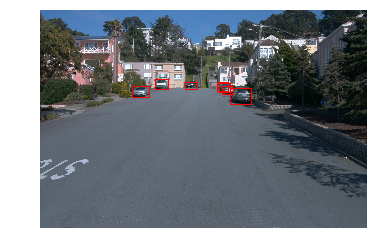

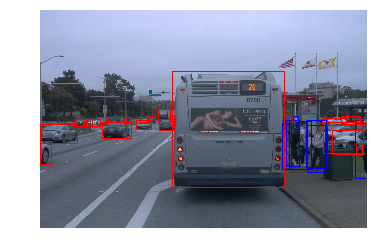

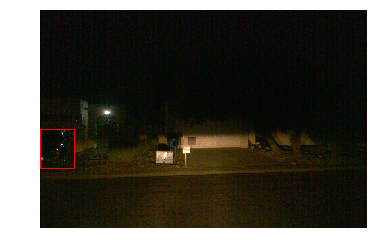

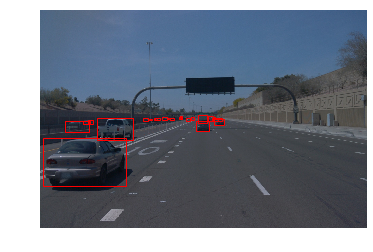

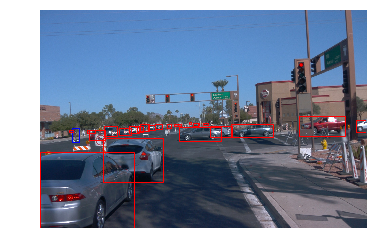

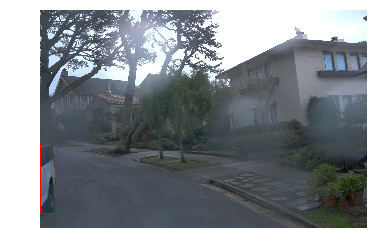

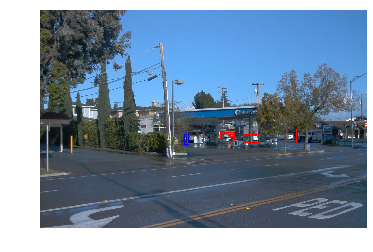

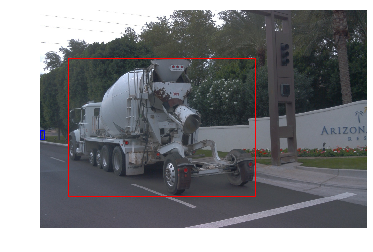

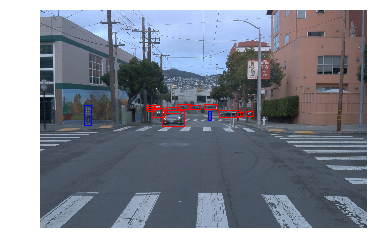

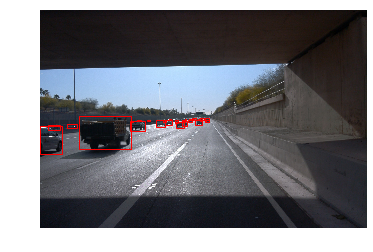

In [4]:
# Display 10 random images in dataset
plt.figure(figsize=(10, 10))
for i in range(10):
    for batch in dataset.shuffle(75, reshuffle_each_iteration=True).take(1):
        display_instances(batch)
plt.show()

## Additional EDA

In this last part, you are free to perform any additional analysis of the dataset. What else would like to know about the data?
For example, think about data distribution. So far, you have only looked at a single file...

In [5]:
for batches in dataset.take(1):
        for labels, value in batches.items():
            print("{:20s}: {}".format(labels, value.numpy()))

image               : [[[ 67 101 149]
  [ 69 103 151]
  [ 67 103 151]
  ...
  [ 65 107 157]
  [ 66 108 158]
  [ 67 109 159]]

 [[ 67 101 149]
  [ 68 102 150]
  [ 66 102 150]
  ...
  [ 66 108 158]
  [ 67 109 159]
  [ 68 110 160]]

 [[ 64 100 148]
  [ 64 100 148]
  [ 65 101 149]
  ...
  [ 68 110 160]
  [ 68 110 160]
  [ 69 111 161]]

 ...

 [[100  87  94]
  [100  87  94]
  [ 99  88  92]
  ...
  [ 67  71  74]
  [ 68  72  75]
  [ 69  73  76]]

 [[101  88  95]
  [101  88  95]
  [ 99  88  92]
  ...
  [ 66  70  73]
  [ 66  70  73]
  [ 66  70  73]]

 [[101  88  95]
  [101  88  95]
  [ 99  88  92]
  ...
  [ 65  69  72]
  [ 65  69  72]
  [ 66  70  73]]]
source_id           : b'segment-10963653239323173269_1924_000_1944_000_with_camera_labels_41.tfrecord'
key                 : b''
filename            : b'segment-10963653239323173269_1924_000_1944_000_with_camera_labels_41.tfrecord'
groundtruth_image_confidences: []
groundtruth_verified_neg_classes: []
groundtruth_not_exhaustive_classes: []
ground

In [91]:
# initialize each label count to 0
images_sampled = 32768
dataframe = {'batch_number': [], 'object': [], 'count': []}
batch_number = 1
for batches in dataset.take(images_sampled):
    object_count = {1: 0, 2 : 0, 4: 0 }
    
    for l in batches["groundtruth_classes"].numpy():
        object_count[l] += 1
        
    for l in object_count.keys():
        dataframe['batch_number'].append(batch_number)
        dataframe['object'].append(l)
        dataframe['count'].append(object_count[l])
        
    batch_number += 1

In [92]:
import pandas as pd

images_df = pd.DataFrame(dataframe)
object_to_name = {1: 'car', 2 : 'pedestrian', 4: 'cyclist'}
images_df['object_class'] = images_df['object'].apply(lambda x : object_to_name[x])
images_df.head()

,batch_number,object,count,object_class
0,1,1,42,car
1,1,2,3,pedestrian
2,1,4,0,cyclist
3,2,1,9,car
4,2,2,1,pedestrian


In [93]:
images_sampled

32768

[Text(0, 0.5, 'Number of Classified Objects'),
 Text(0.5, 0, 'Classes'),
 Text(0.5, 1.0, 'Distribution of Classes')]

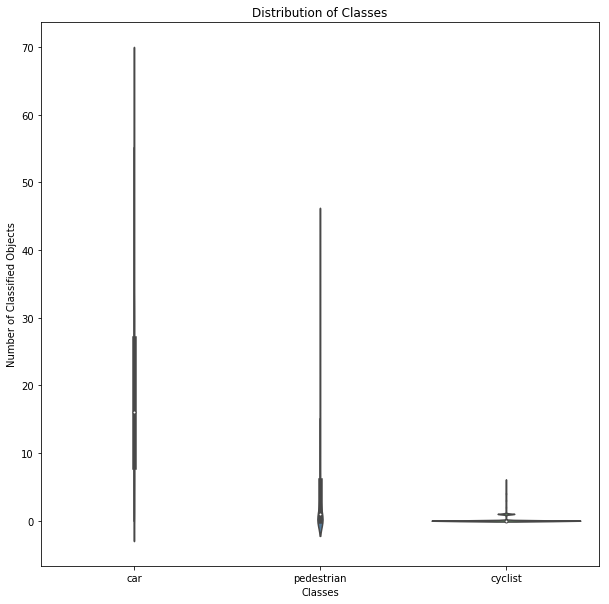

In [94]:
import seaborn as sns
sns.set_palette("Set1", 8, .75)

plt.figure(figsize=(10, 10))
ax = sns.violinplot(x="object_class", y="count", data=images_df)
ax.set(xlabel='Classes', ylabel='Number of Classified Objects', title='Distribution of Classes')

[Text(0, 0.5, 'Number of Classified Objects'),
 Text(0.5, 0, 'Classes'),
 Text(0.5, 1.0, 'Distribution of Classes')]

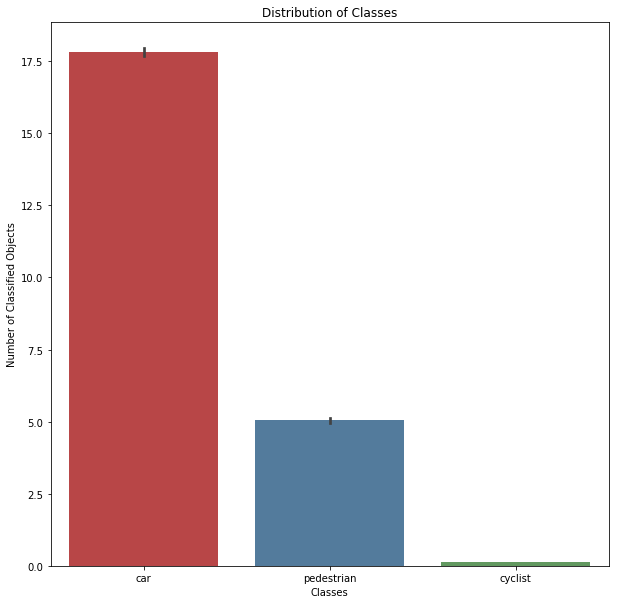

In [95]:
plt.figure(figsize=(10, 10))
ax = sns.barplot(x='object_class', y="count", data=images_df)
ax.set(xlabel='Classes', ylabel='Number of Classified Objects', title='Distribution of Classes')

/home/andre/.local/lib/python3.8/site-packages/matplotlib/cbook/__init__.py:1377: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
/home/andre/.local/lib/python3.8/site-packages/matplotlib/axes/_base.py:237: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
/home/andre/.local/lib/python3.8/site-packages/matplotlib/axes/_base.py:239: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


[Text(0, 0.5, 'Count'),
 Text(0.5, 0, 'Number of Cars'),
 Text(0.5, 1.0, 'Distribution of Cars in Images')]

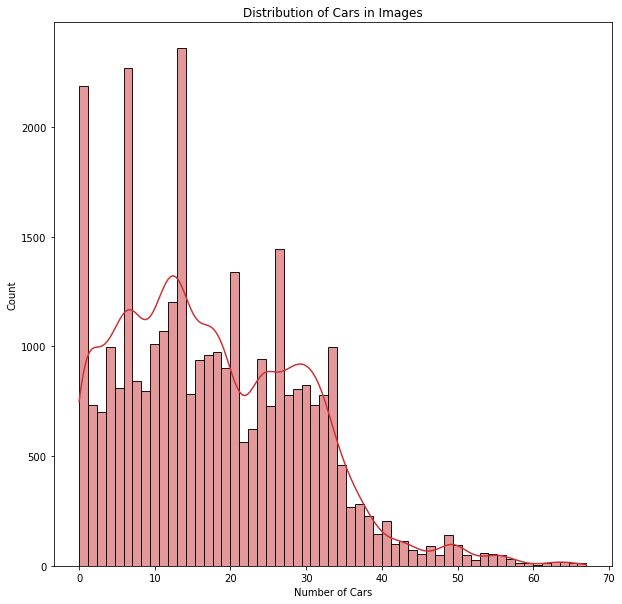

In [106]:
plt.figure(figsize=(10, 10))
ax_cars = sns.histplot(data=images_df[images_df['object_class'] == 'car'], x='count', kde=True)
ax_cars.set(xlabel='Number of Cars', ylabel='Count', title='Distribution of Cars in Images')

/home/andre/.local/lib/python3.8/site-packages/matplotlib/cbook/__init__.py:1377: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
/home/andre/.local/lib/python3.8/site-packages/matplotlib/axes/_base.py:237: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
/home/andre/.local/lib/python3.8/site-packages/matplotlib/axes/_base.py:239: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


[Text(0, 0.5, 'Count'),
 Text(0.5, 0, 'Number of Pedestrians'),
 Text(0.5, 1.0, 'Distribution of Pedestrians in Images')]

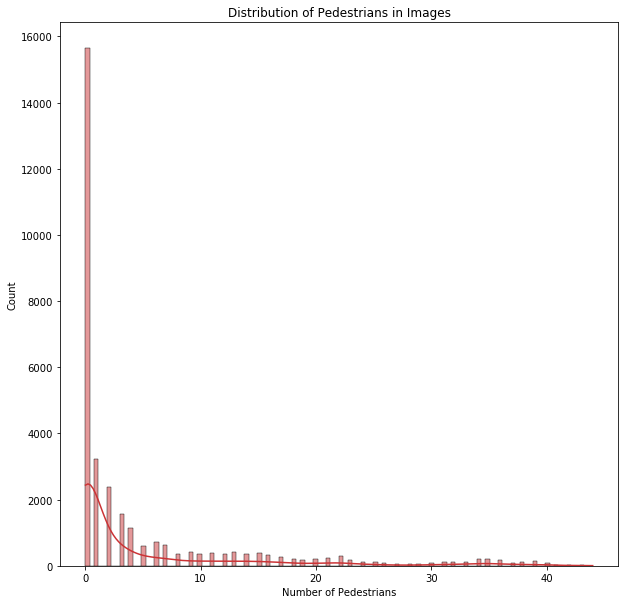

In [108]:
plt.figure(figsize=(10, 10))
ax_cars = sns.histplot(data=images_df[images_df['object_class'] == 'pedestrian'], x='count', kde=True)
ax_cars.set(xlabel='Number of Pedestrians', ylabel='Count', title='Distribution of Pedestrians in Images')

/home/andre/.local/lib/python3.8/site-packages/matplotlib/cbook/__init__.py:1377: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
/home/andre/.local/lib/python3.8/site-packages/matplotlib/axes/_base.py:237: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
/home/andre/.local/lib/python3.8/site-packages/matplotlib/axes/_base.py:239: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


[Text(0, 0.5, 'Count'),
 Text(0.5, 0, 'Number of Cyclists'),
 Text(0.5, 1.0, 'Distribution of Cyclists in Images')]

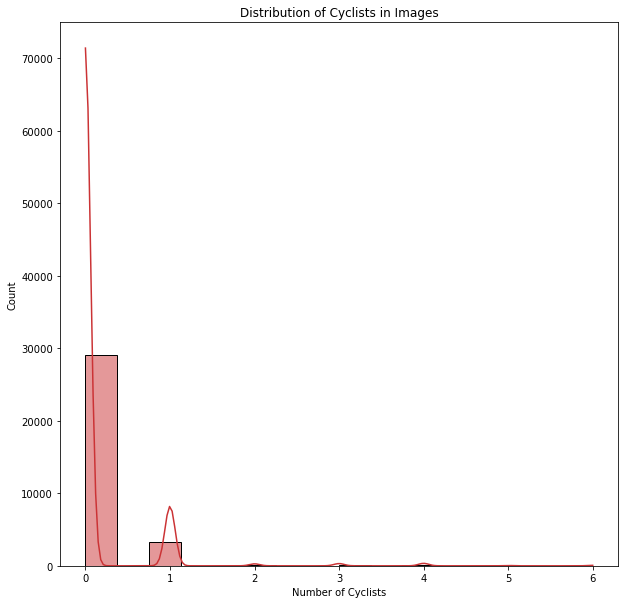

In [111]:
plt.figure(figsize=(10, 10))
ax_cars = sns.histplot(data=images_df[images_df['object_class'] == 'cyclist'], x ='count', kde=True)
ax_cars.set(xlabel='Number of Cyclists', ylabel='Count',  title='Distribution of Cyclists in Images')

[Text(0, 0.5, 'Count'),
 Text(0.5, 0, 'Number of Objects from Class'),
 Text(0.5, 1.0, 'Distribution of Classes in Images')]

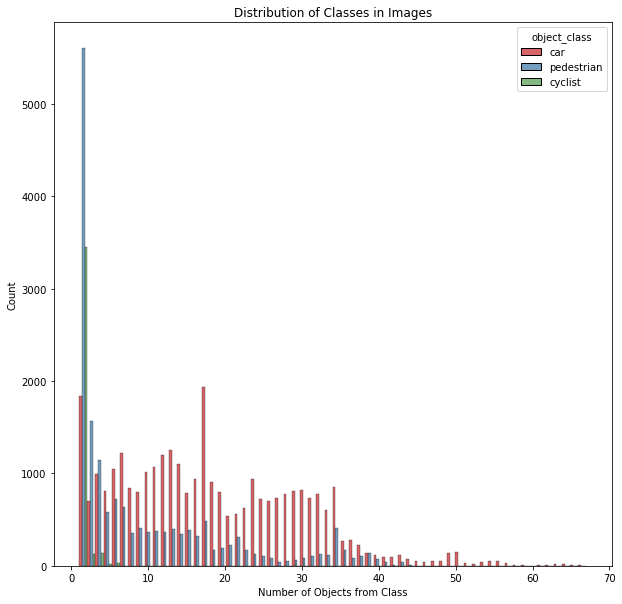

In [117]:
plt.figure(figsize=(10, 10))
ax_cars = sns.histplot(data=images_df[images_df['count'] > 0], x='count', hue='object_class', multiple="dodge")
ax_cars.set(xlabel='Number of Objects from Class', ylabel='Count', title='Distribution of Classes in Images')